# Adidas Sales Dataset

##### An Adidas sales dataset is a collection of data that includes information on the sales of Adidas products. This type of dataset may include details such as the number of units sold, the total sales revenue, the location of the sales, the type of product sold, and any other relevant information.

##### Adidas sales data can be useful for a variety of purposes, such as analyzing sales trends, identifying successful products or marketing campaigns, and developing strategies for future sales. It can also be used to compare Adidas sales to those of competitors, or to analyze the effectiveness of different marketing or sales channels.

##### There are a variety of sources that could potentially provide an Adidas sales dataset, including Adidas itself, market research firms, government agencies, or other organizations that track sales data. The specific data points included in an Adidas sales dataset may vary depending on the source and the purpose for which it is being used.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df_adidas = pd.read_excel('./datasets/Adidas_US_Sales_Datasets.xlsx', skiprows=4, usecols="B:N")

In [3]:
print('Dataset has ', df_adidas.shape[0],' records and ', df_adidas.shape[1], ' columns' )
df_adidas.head(3)

Dataset has  9648  records and  13  columns


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store


In [4]:
df_adidas.info()
# df_adidas.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [5]:
df_adidas['year'] = df_adidas['Invoice Date'].dt.year
df_adidas['month'] = df_adidas['Invoice Date'].dt.month

In [6]:
print(len(df_adidas['Retailer'].unique()), df_adidas['Retailer'].unique())

6 ['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']


In [7]:
print(len(df_adidas['State'].unique()), df_adidas['Product'].unique())

50 ["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]


In [8]:
print(len(df_adidas['Product'].unique()), df_adidas['Product'].unique())

6 ["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]


In [9]:
print(len(df_adidas['Sales Method'].unique()), df_adidas['Sales Method'].unique())

3 ['In-store' 'Outlet' 'Online']


In [10]:
df_adidas.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991,2020.865050,6.458126
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,2020.000000,1.000000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000,2021.000000,3.000000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000,2021.000000,6.000000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000,2021.000000,9.000000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2021.000000,12.000000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197,0.341688,3.454799


<Axes: xlabel='year,month'>

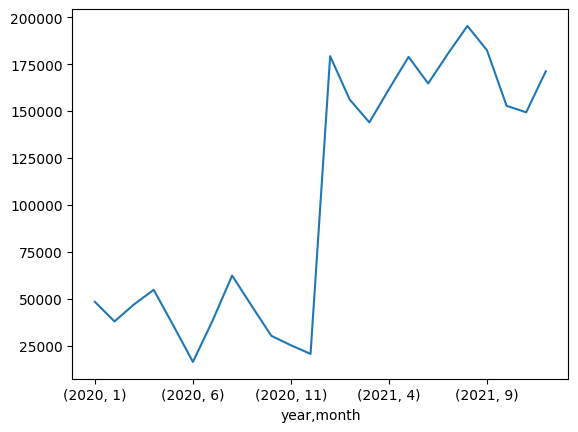

In [11]:
df_adidas.groupby(['year', 'month'])['Units Sold'].sum().plot.line()

In [12]:
df_adidas.groupby(['year', 'month'])['Units Sold'].sum()

year  month
2020  1         48333
      2         37846
      3         46972
      4         54709
      5         35705
      6         16269
      7         38219
      8         62307
      9         46125
      10        30167
      11        25152
      12        20545
2021  1        179299
      2        156113
      3        143988
      4        161717
      5        178900
      6        164745
      7        180481
      8        195414
      9        182425
      10       152834
      11       149350
      12       171246
Name: Units Sold, dtype: int64

In [13]:
df_adidas.pivot_table(index='year', columns='month', values='Units Sold', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333,37846,46972,54709,35705,16269,38219,62307,46125,30167,25152,20545
2021,179299,156113,143988,161717,178900,164745,180481,195414,182425,152834,149350,171246


In [14]:
df_adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='year,month'>

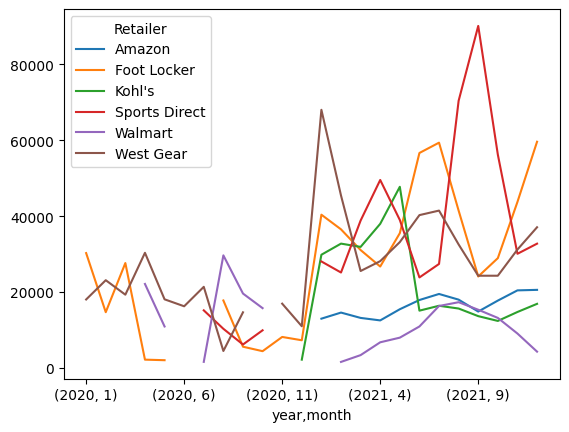

In [15]:
df_adidas.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum').plot.line()

In [16]:
df_adidas[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer')

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


In [17]:
df_buf = df_adidas[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values(['Retailer', 'Retailer ID', 'year', 'month'])
df_buf

,Retailer,Retailer ID,year,month
1224,Amazon,1185732,2021,1
1225,Amazon,1185732,2021,2
1231,Amazon,1185732,2021,3
1237,Amazon,1185732,2021,4
1243,Amazon,1185732,2021,5
...,...,...,...,...
2769,West Gear,1197831,2021,8
2775,West Gear,1197831,2021,9
2714,West Gear,1197831,2021,10
2715,West Gear,1197831,2021,11


In [18]:
df_buf.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count')

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<Axes: xlabel='year,month'>

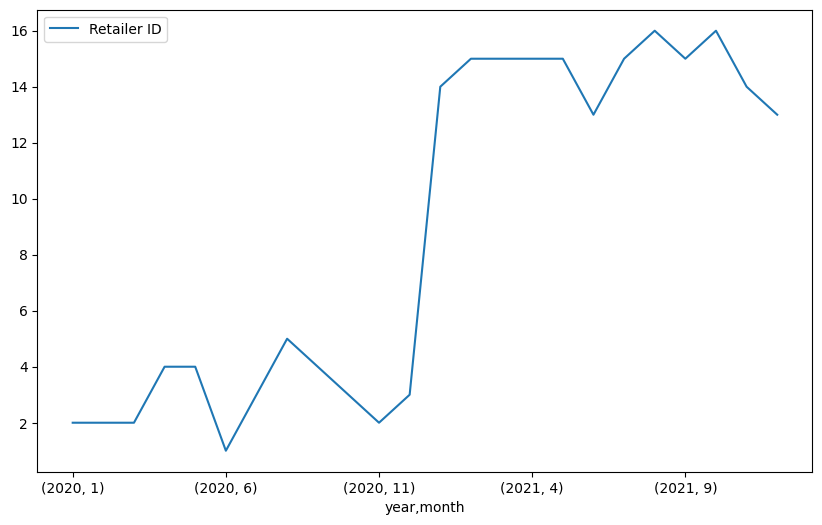

In [19]:
df_buf.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count').plot(kind='line', figsize = (10, 6))

In [20]:
df_buf.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count')

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            NaN      NaN        1.0
     2         NaN          1.0     NaN            NaN      NaN        1.0
     3         NaN          1.0     NaN            NaN      NaN        1.0
     4         NaN          1.0     NaN            NaN      1.0        2.0
     5         NaN          1.0     NaN            1.0      1.0        1.0
     6         NaN          NaN     NaN            NaN      NaN        1.0
     7         NaN          NaN     NaN            1.0      1.0        1.0
     8         NaN          1.0     NaN            1.0      1.0        2.0
     9         NaN          1.0     NaN            1.0      1.0        1.0
     10        NaN          1.0     NaN            1.0      1.0        NaN
     11        NaN          1.0     NaN            NaN      NaN        1.0
     12        NaN          1.0     1.0            NaN      NaN        1.0
2021 1         1.0          3.0     4.0            3.0      NaN        3.0
     2         1.0          3.0     4.0            3.0      1.0        3.0
     3         1.0          3.0     4.0            3.0      1.0        3.0
     4         1.0          2.0     4.0            3.0      2.0        3.0
     5         1.0          2.0     4.0            3.0      2.0        3.0
     6         1.0          2.0     3.0            2.0      2.0        3.0
     7         1.0          3.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     3.0            3.0      3.0        3.0
     9         1.0          2.0     3.0            3.0      3.0        3.0
     10        1.0          3.0     3.0            3.0      3.0        3.0
     11        1.0          3.0     3.0            3.0      1.0        3.0
     12        1.0          3.0     3.0            2.0      1.0        3.0

<Axes: xlabel='year,month'>

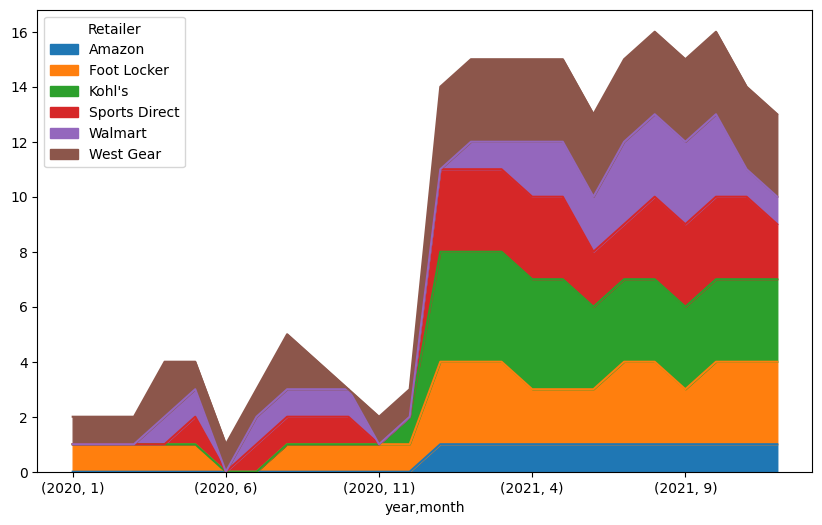

In [21]:
df_buf.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count').plot(kind='area', figsize=(10, 6))

#### Investigating dataset: 2020 decreased due to Covid-19, increased after 2021

In [22]:
df_adidas.groupby('year').agg({'Operating Margin': 'mean'})

,Operating Margin
year,
2020,0.403733
2021,0.425996


<Axes: xlabel='year,month'>

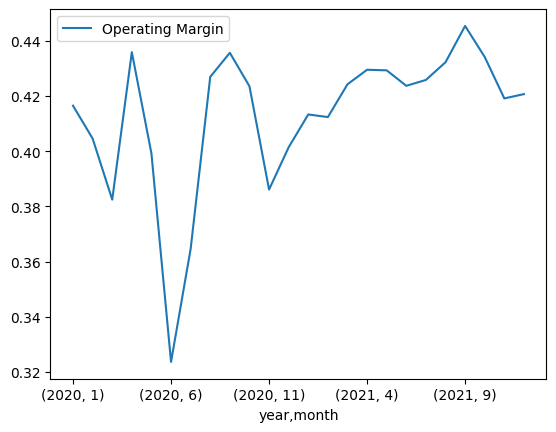

In [23]:
df_adidas.pivot_table(index=['year', 'month'], values='Operating Margin', aggfunc='mean').plot()

<Axes: xlabel='year,month'>

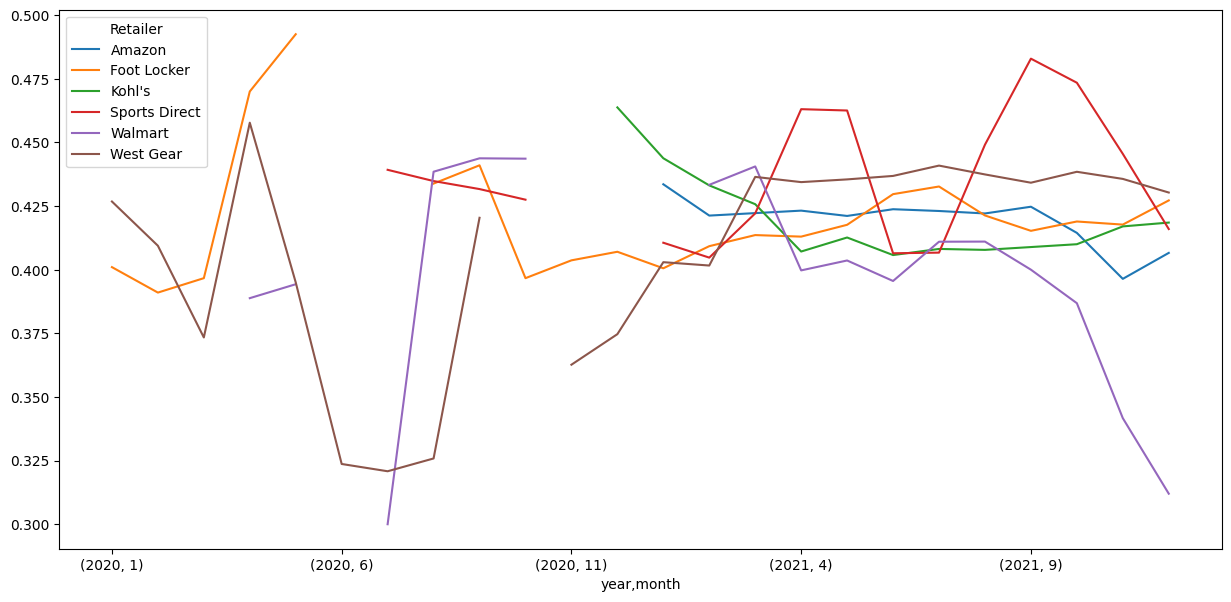

In [24]:
df_adidas.pivot_table(index=['year', 'month'],columns='Retailer', values='Operating Margin', aggfunc='mean').plot(kind='line', figsize=(15,7))

<Axes: xlabel='year,month'>

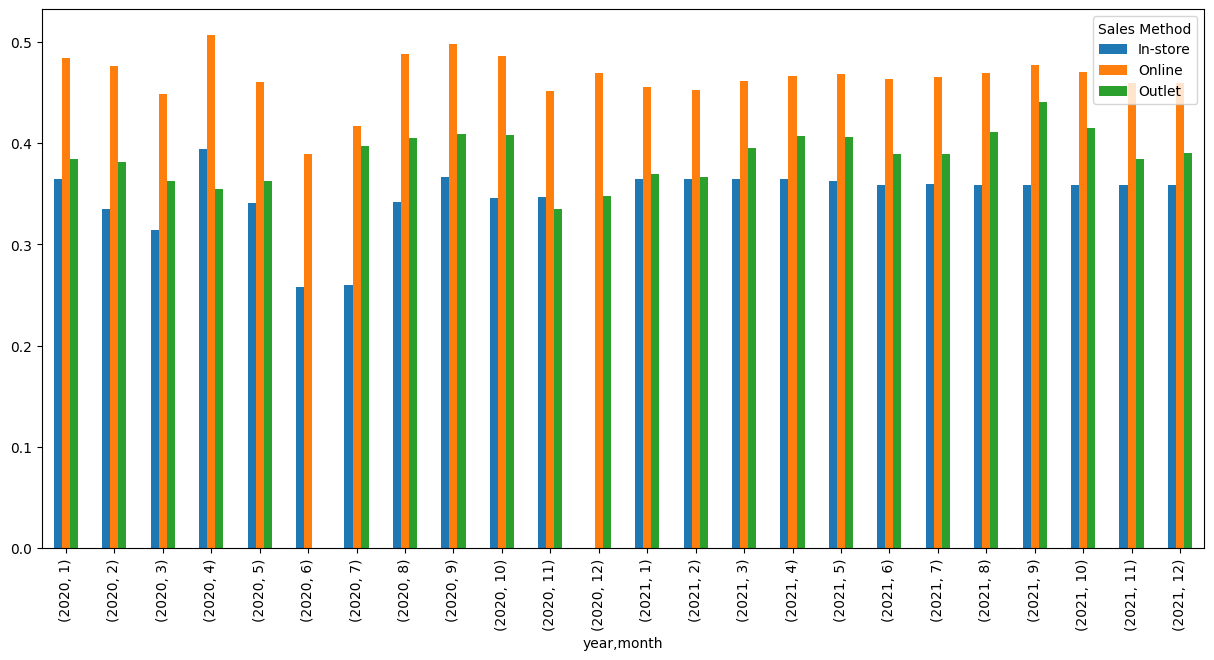

In [25]:
df_adidas.pivot_table(index=['year', 'month'],columns='Sales Method', values='Operating Margin', aggfunc='mean').plot(kind='bar', figsize=(15,7))

<Axes: xlabel='year,month'>

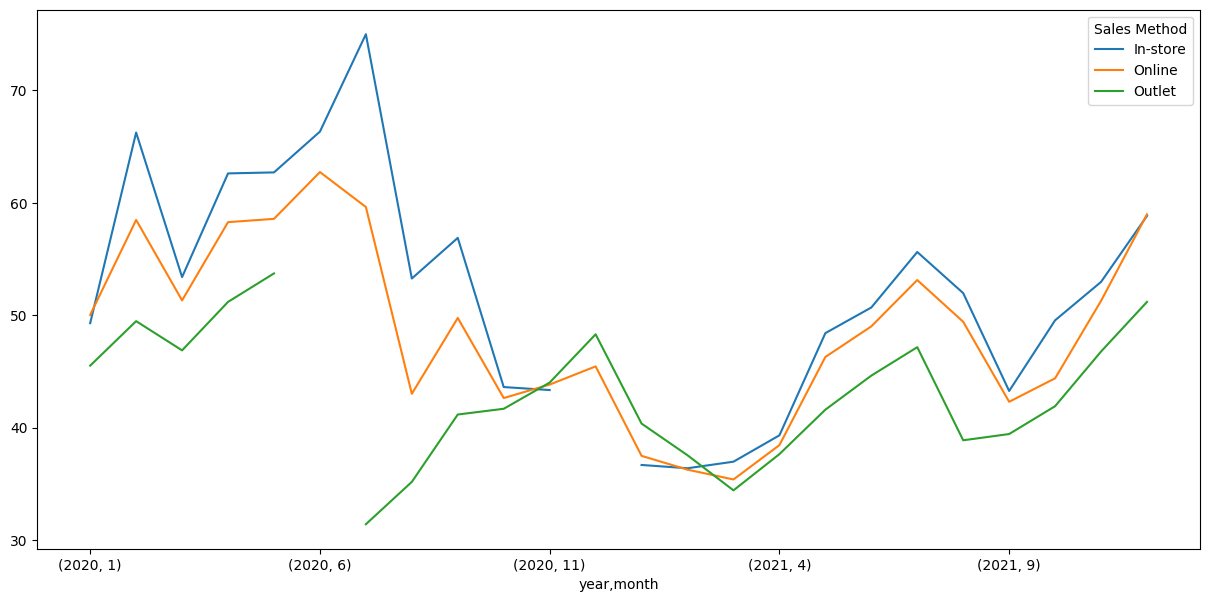

In [26]:
df_adidas.pivot_table(index=['year', 'month'],columns='Sales Method', values='Price per Unit', aggfunc='mean').plot(kind='line', figsize=(15,7))

## statistical analysis

#### ANOVA, OLS

<Axes: title={'center': 'Price per Unit'}, xlabel='[Sales Method]'>

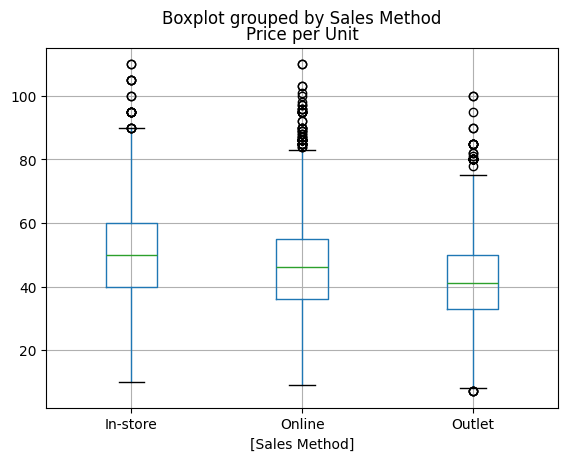

In [27]:
df_adidas[['Sales Method', 'Price per Unit']].boxplot(by='Sales Method')

<Axes: title={'center': 'Operating Margin'}, xlabel='[Sales Method]'>

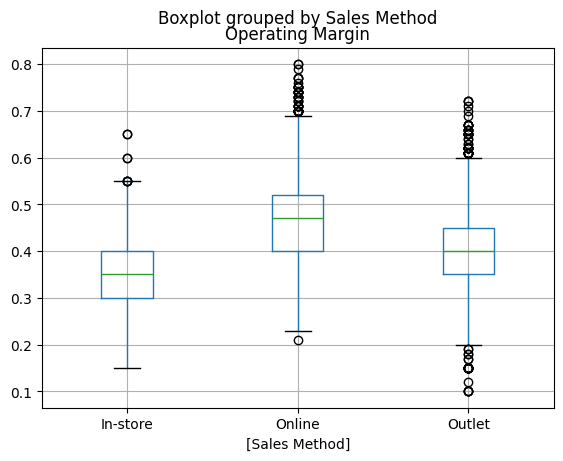

In [28]:
df_adidas[['Sales Method', 'Operating Margin']].boxplot(by='Sales Method')

In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [33]:
x = 'Sales Method'
y = 'Operating Margin'

In [34]:
df_stat = df_adidas[[x, y]]
df_stat

,Sales Method,Operating Margin
0,In-store,0.50
1,In-store,0.30
2,In-store,0.35
3,In-store,0.35
4,In-store,0.30
...,...,...
9643,Outlet,0.28
9644,Outlet,0.32
9645,Outlet,0.37
9646,Outlet,0.42


In [35]:
x = x.replace(' ', '_')
y = y.replace(' ', '_')
print(x, '/', y)

Sales_Method / Operating_Margin


In [37]:
df_stat.columns = [x, y]
df_stat.columns

Index(['Sales_Method', 'Operating_Margin'], dtype='object')

In [38]:
model = ols(f'{y} ~ C({x})', df_stat).fit()

In [39]:
anova_tb = anova_lm(model)
print(anova_tb)

                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN


In [40]:
if anova_tb.iloc[0,4]<0.05:
    print(f'There is a difference in {y} depending on the sales method.')
else:
    print(f'There is no difference in {y} depending on the sales method.')

There is a difference in Operating_Margin depending on the sales method.


In [41]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def anova_analysis(x, y):
    df_stat = df_adidas[[x, y]]

    x = x.replace(' ', '_')
    y = y.replace(' ', '_')

    df_stat.columns = [x, y]

    model = ols(f'{y} ~ C({x})', df_stat).fit()

    anova_tb = anova_lm(model)
    print(anova_tb)

    if anova_tb.iloc[0,4]<0.05:
        print(f'There is a difference in {y} depending on the sales method.')
    else:
        print(f'There is no difference in {y} depending on the sales method.')

In [42]:
anova_analysis('Sales Method', 'Price per Unit')

                     df        sum_sq       mean_sq           F        PR(>F)
C(Sales_Method)     2.0  5.550261e+04  27751.304281  131.810754  3.339384e-57
Residual         9645.0  2.030649e+06    210.538999         NaN           NaN
There is a difference in Price_per_Unit depending on the sales method.


In [43]:
anova_analysis('Sales Method', 'Operating Margin')

                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN
There is a difference in Operating_Margin depending on the sales method.


## Conclusion

#### => The unit price varies depending on the sales method, in the order of In Store > Online > Outlet.

#### => This means that the average transaction value per customer is highest in stores, followed by online, and then outlets, although this does not imply higher discount rates.

#### => Outlets often sell products not available in stores or online, making them a challenging comparison target for insight analysis.

#### => There are also differences in profit margins depending on the sales method, in the order of Online > Outlet > In Store.

### Analysis Results
#### => Online: Products with lower unit prices sell well, and the profit margins are high.
#### => Store: Products with higher unit prices sell well, but the profit margins are lower.